# 04. PyTorch Custom Datasets

- A custom dataset is a collection of data relating to(관련된) a specific problem you're working on.
- a custom dataset can be comprised of(구성될 수 있다) almost anything.
- 어떤걸 만들려고 한다면 그거에 맞는 커스텀 데이터셋이 필요하다다
- PyTorch includes many existing functions to load in various custom datasets in the TorchVision, TorchText, TorchAudio and TorchRec domain libraries.



## 0. Importing PyTorch and setting up device-agnostic(기기 독립적) code

In [2]:
import torch
from torch import nn  # 뉴럴 네트워크 신경망

torch.__version__

'2.7.1+cu126'

In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


## 1. Get data

In [4]:
import requests  #요청하다, 요구하다 #웹사이트에서 데이터(파일, 텍스트)를 가지고 오는데 유용용
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/'")
image_path = data_path / "pizza_steak_sushi"   #경로 만들어 놓기기

# Setup path to data folder
if image_path.is_dir():   #디렉토리가 있냐?
    print(f"{image_path} directory exists")
else:
    print(f"Did not find {image_path} directory, creating one....")
    image_path.mkdir(parents = True, exist_ok = True) #디렉토리 만들기
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:  #파일을 새로 만들기 위한 준비 작업 # 아직 pizza_steak_sushi.zip은 없어
                                                                #"wb" write binary 이진 모드로 쓰기(zip,이미지, 영상을 작성 시), "빈 파일" 열어두기
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # get 함수로 주소의 데이터 요청하기
        print("Downloading pizza,steak,sushi data...")                                                                   #GitHub에 있는 .zip 파일을 "GET 요청"으로 받아온다
        f.write(request.content)  #request.content 안에 "pizza_steak_sushi.zip" 이 있다.
        # as f 열린 파일 객체에 이름 부여하기
        
    # Unzip pizza, steak, sushi data # 압축된 덩어리를 풀기 위해 zipfile.ZipFile를 사용
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)   #아카이브(보관소)에 저장된 모든 member를 가지고 온다는데? #zip 안에 있는 모든 파일을 한꺼번에 불러와줌 


data\'\pizza_steak_sushi directory exists


## 2. 데이터 준비

In [5]:
## 하위디렉토리의 수, 하위디렉토리의 이미지 수, 각 하위 디렉토리의 이름 walk하기기

import os 
def walk_through_dir(dir_path):
    """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
     

In [6]:
walk_through_dir(image_path) # image_path 로 했으니  zip 데이터는 불러오지 않는다.

There are 2 directories and 0 images in 'data\'\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\'\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\'\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\'\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\'\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\'\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\'\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\'\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\'\pizza_steak_sushi\train\sushi'.


In [7]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath("data/'/pizza_steak_sushi/train"),
 WindowsPath("data/'/pizza_steak_sushi/test"))

### 2.1 Visualize an image

1. Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
2. Pick a random image path using Python's random.choice().
3. Get the image class name using pathlib.Path.parent.stem.
4. And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library).


Random image path: data\'\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


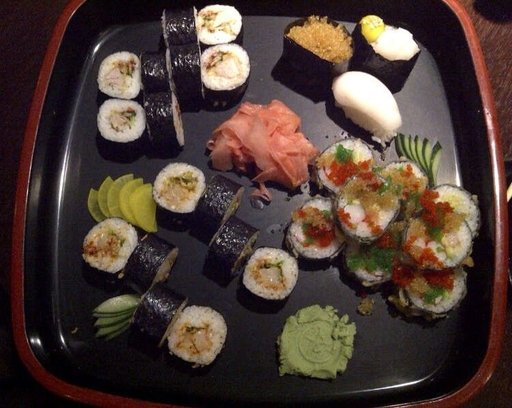

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem # stem 제거 시 이름이 나오지 않고 상위 폴더 경로가 나온다. 
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

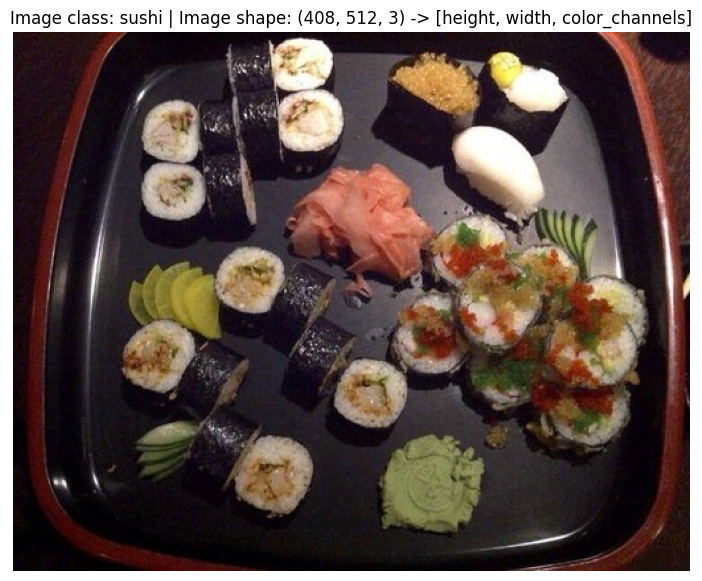

In [17]:
## matplotlib 을 이용할 수도 있지만 numpy로 변경해야 하는 번거로움이 있음

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## 3. Transforming data

- 이미지 데이터를 로드하려면 텐서로 변환하고 데이터 셋을 만든 다음 dataloader로 만든다

In [19]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with torchvision.transforms
- 이미지 포맷팅, 텐서로 변환, 심지어 데이터 증강 목적으로 이미지를 조작하기 위한 미리 구축된 메서드가 많이 포함되어 있습니다.

In [22]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size = (64,64)),
    # Flip the images randomly on the horizontal 좌우 반전 거울 처럼
    transforms.RandomHorizontalFlip(p=0.5),# p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
    # 신경망은 입력 값이 작고 일정할수록 학습이 안정적이다. 그래서 픽셀값(색상) 을  각 픽셀 값을 255로 나눠서 0.0~1.0 범위로 변환 
    # 컴퓨터는 이미지를 숫자의 배열로 생각할 뿐이어서 텐서로도 이미지 읽을 수 있음
])

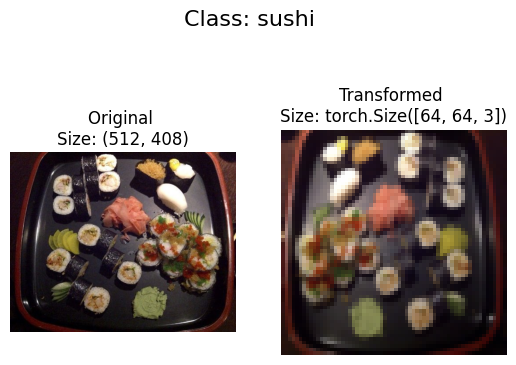

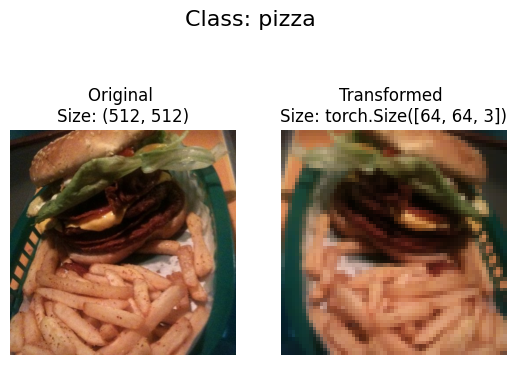

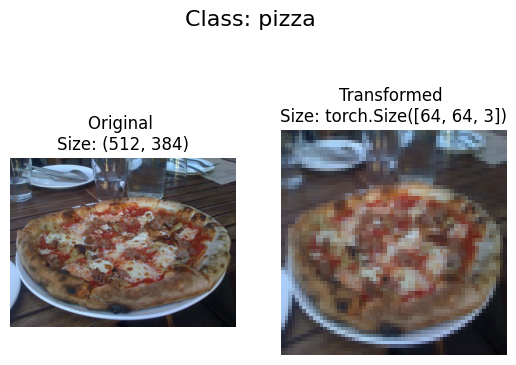

In [23]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

## 4. Option 1: Loading Image Data Using ImageFolder 이미지 폴더를 이용하여 이미지 로드

In [26]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root =train_dir, # target folder of images
                                  transform = data_transform, # transforms to perform on data (images)
                                  target_transform = None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\'\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\'\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [28]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [29]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [30]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [32]:
#인덱스를 이용해 데이터셋의 이미지와 라벨을 받을 수 있다.
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


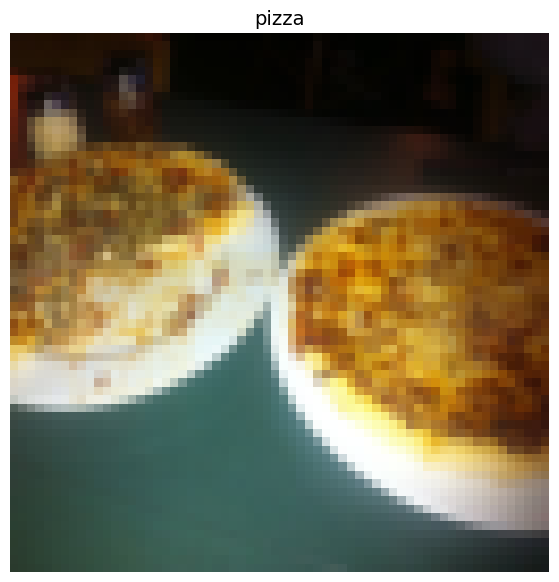

In [ ]:
# Rearrange the order of dimensions  차원 순서를 다시 정렬하여 HWC 로 변경
img_permute = img.permute(1,2,0)

# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);  # 원래 512*512 를 64*64로 변경하니까 픽셀이 깨져보인다


### 4.1 Turn loaded images into DataLoader's


In [37]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size =1, # how many samples per batch?
                              num_workers =1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle = True) # shuffle the data?

test_dataloader = DataLoader(dataset =test_data,
                             batch_size =1,
                             num_workers =1,
                             shuffle = False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x293310c76b0>,
 <torch.utils.data.dataloader.DataLoader at 0x29331040b00>)

In [ ]:
img, label = next(iter(train_dataloader))   #인덱스로 꺼낼 수도 있으니까 

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading Image Data with a Custom Dataset

- Python's os for dealing with directories (our data is stored in directories).
- Python's pathlib for dealing with filepaths (each of our images has a unique filepath).
- torch for all things PyTorch.
- PIL's Image class for loading images.
- torch.utils.data.Dataset to subclass and create our own custom Dataset.
- torchvision.transforms to turn our images into tensors.
- Various types from Python's typing module to add type hints to our code.

In [40]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List 

In [41]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names
- 디렉토리 경로가 주어지면 클래스 이름 목록과 클래스 이름과 인덱스 사전을 생성할 수 있는 도우미 함수 만들기

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path/ "train"))]) # 반환값은 os.DirEntry 객체들의 iterator
# 학습데이터의 클래스 폴더 이름만 추출 #entry.name : 파일 맨 뒤만 출력 #   os.DirEntry : 파일인지/폴더인지 판별

#파일 경로

#파일 이름

#파일 크기

#등 다양한 속성/메서드를 빠르게 얻을 수 있다다 (속도도 빠름!)



print(f"Class names found: {class_names_found}")

Target directory: data\'\pizza_steak_sushi\train
Class names found: ['pizza', 'steak', 'sushi']


In [ ]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.     객체이름을 로드할 대상 디렉토리를 인수로 넣기

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))  반환값으로 리스트의 이름, 딕셔너리 형태의 클래스: 인덱스스
    
    Example:
        find_classes("food_images/train") 예시 보면 바로 이해됨
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes: #파이썬에선 빈리스트는 False
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx
    
    

In [59]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom Dataset to replicate ImageFolder

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform = None) -> None:
        
        # 3. Create class attributes
        # Get all image paths                                   #*/* 의 의미 : 현재 디렉토리의 모든 하위 폴더 안의 모든 파일
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))# note: you'd have to update this if you've got .png's or .jpeg's
        # Python의 pathlib 모듈은 파일 경로를 문자열로 다루는 대신 객체로 처리하게 해주는 모듈입니다.
        # Path(targ_dir)는 targ_dir이라는 문자열 경로를 Path 객체로 바꾸는 것이에요
        
        # Setup transforms
        self.transform = transform   #어떻게 변환할 건지 너가 정하기
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)
        
    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)  #이미지 보이기
    
    # 5. Overwrite(덮어쓰기) the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
        
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name  # expects path in data_folder/class_name/image.jpeg   # 상위폴더의 이름(class_name)를 가지고 오기
        class_idx = self.class_to_idx[class_name]
        
        # Transform if necessary   #바꾼다면 load_image 함수에 반환값을 transform 아니라면 그냥 추출
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx 
        
    
        

In [61]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5), #주어진 확률로 주어진 이미지를 무작위로 수평으로 뒤집습니다.
    transforms.ToTensor()                  #Compose 함수 중요!!!! 순차적으로 이미지 변환(transforms)을 실행해줌. transforms는 단일함수이기 때문에

])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [62]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x29331169a00>,
 <__main__.ImageFolderCustom at 0x293316e3c80>)

In [63]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [64]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [65]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [66]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset #### 이미지폴더에 들어있는 데이터셋과 커스텀 데이터 셋이 동일한지
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### 5.3 Create a function to display random images


- display_random_images() :시각화를 도와주는 함수

In [67]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

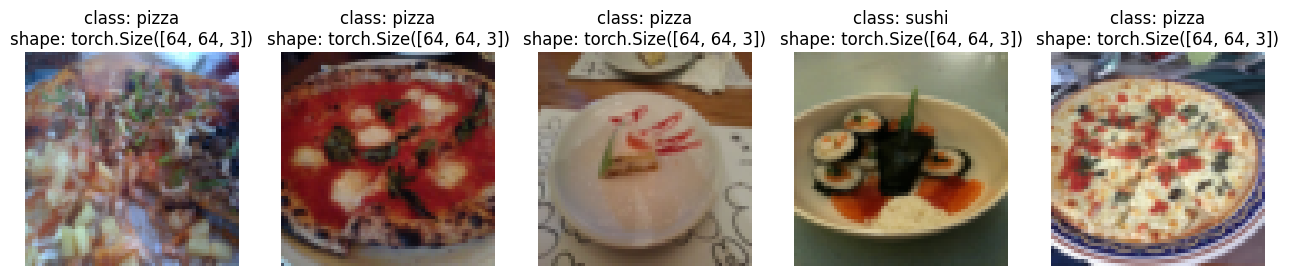

In [68]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


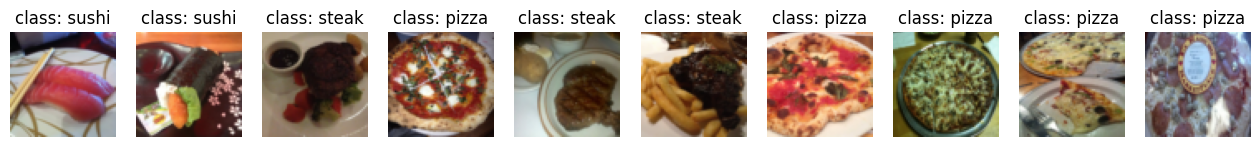

In [69]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

### 5.4 Turn custom loaded images into DataLoader's

In [70]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x2933125ad20>,
 <torch.utils.data.dataloader.DataLoader at 0x2933127fce0>)

In [71]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 6. Other forms of transforms (data augmentation) 데이터 증강기법
- 이미지를 무작위로 지우거나 자르거나, 회전

In [ ]:
#TrivialAugmentWide를 이용해 이미지 변환,0은 범위가 없음을 의미하고, 31은 최대 범위(가장 높은 강도가 적용될 가능성이 가장 높음)를 의미

from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

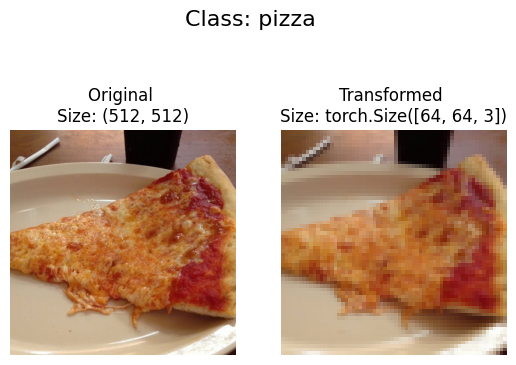

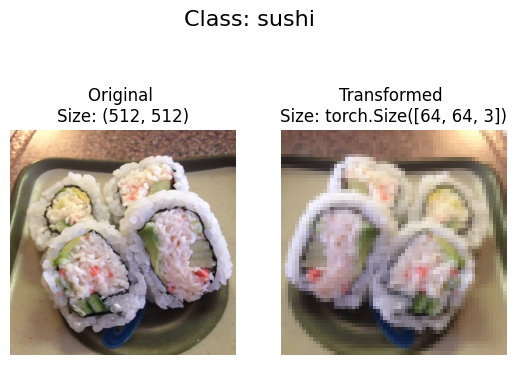

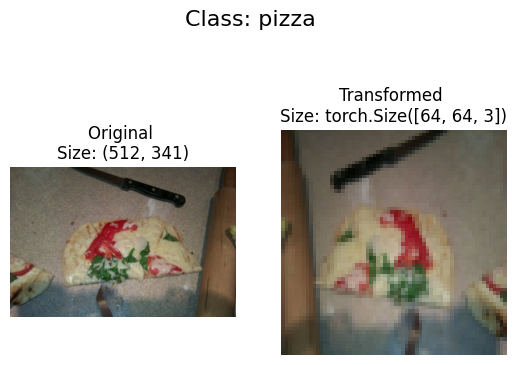

In [72]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

## 7. Model 0: TinyVGG without data augmentation

In [73]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [74]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 40 workers.


(<torch.utils.data.dataloader.DataLoader at 0x293316e0470>,
 <torch.utils.data.dataloader.DataLoader at 0x29331a51430>)

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion(연산자 융합)

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 7.4 Use torchinfo to get an idea of the shapes going through our model
- torchinfo를 사용해 모델의 정보 얻기print(model)이나 forward() 메서드 내에서도 데이터 형상 출력 가능

In [77]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
    
from torchinfo import summary  #요약
summary(model_0, input_size = [1,3,64,64])  # do a test pass through of an example input size input_size에 대한 test pass 실행행

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Create train & test loop functions

In [79]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X,y) in enumerate(dataloader):
        # Send data to target device
        X,y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(x)
        
        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim =1), dim = 1)
        train_acc += (y_pred_class ==y).sum().item()/len(y_pred)
        
        
    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc/ len(dataloader)
    return train_loss, train_acc        
    
    

In [80]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    # 2. Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_acc": []
               }
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc =train_step(model = model,
                                          dataloader= train_dataloader,
                                          loss_fn = loss_fn,
                                          optimizer = optimizer)
        test_loss, test_acc = train_step(model= model,
            dataloader = test_dataloader,
            loss_fn = loss_fn,)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        
        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results
        
        
    
    